## Import the required libraries

In [66]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
import seaborn as sns

import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

sns.set_style("whitegrid")
%matplotlib inline

### Load Walmart superstore data. Which describe the information about the transactions of the store at different location in terms of sales and profit. In this exercise we try to predict profit using this data as our model for that. Hence, reason for linear regression model import from scikit learn.

In [91]:
df = pd.read_excel("Walmart-Superstore.xls")

In [92]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
5,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
6,9982,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,45014,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,5,0.2,5.3690
7,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
8,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200


### Now we want you to see the statistical details of dataset, so we use describe method and this result it gives us is shown below.

In [93]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,5016.463878,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.101298,32063.693350,623.245101,2.225110,0.206452,234.260108
min,20.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2518.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,5016.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7514.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Now we go deeper dig out more details about our dataset, and we get the data type of our data variables (features), if there is any issue regarding missing value or not? number of columns as well as row.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### And here is the plot of graph to show if there is a relationship between our variable. As rightly said we use sales and profit as our variables.

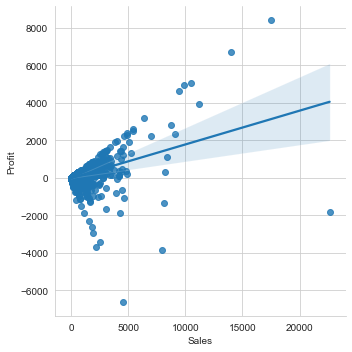

In [114]:
sns.lmplot("Sales","Profit",data=df)


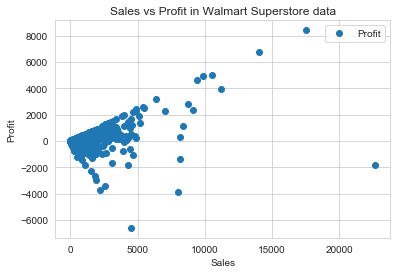

In [96]:
df.plot(x='Sales', y='Profit', style='o')  
plt.title('Sales vs Profit in Walmart Superstore data')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

### We plot graph is used to show what the average sales is. The same is done for profit also.  

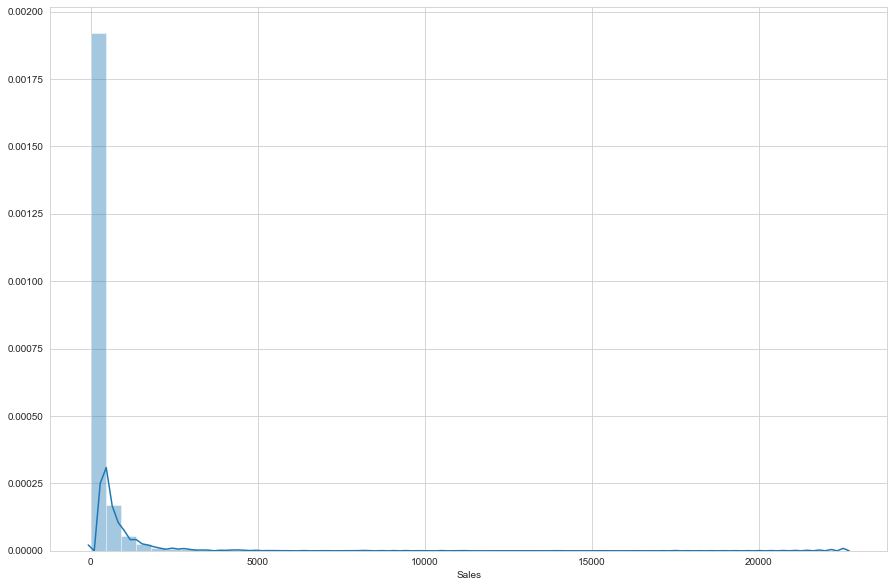

In [115]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df["Sales"])

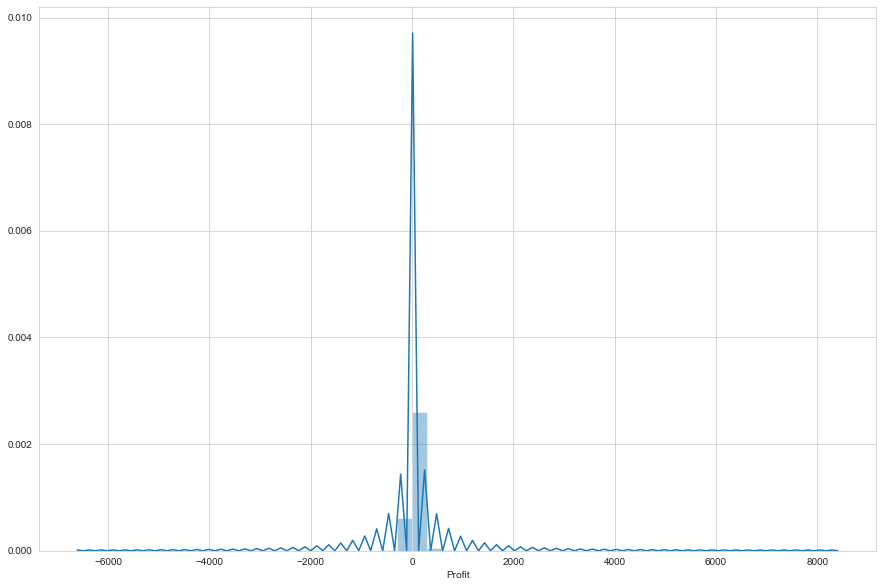

In [116]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df["Profit"])

In [125]:
x = np.array(df[['Sales',
       'Quantity',
       'Discount']])

### The next line shows how reshape our independent variable and dependent varable after assigning to objects x and y, now form a new dataset which we intend to perform our linear regression model on. Then went further to split our newly formed data into train and test sets.  

In [141]:
x = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)
# x = df[['Sales',
#        'Quantity',
#        'Discount']]
# y = df['Profit'].values.reshape(-1,1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Here we call LinearRegression model imported to create our model, and then train our model into it with fit method. By that we have created our model then check the coefficient and intercept of our model before going ahead to display our predict prices against the actual prices. To observe the disparity and tell if the model performance is good enough or not. 

In [143]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.intercept_)

[-7.59468653]


In [144]:
print(regr.coef_)

[[0.15403857]]


In [145]:
pred = regr.predict(X_test)

In [146]:
print(y_test, pred)

[[11.68  ]
 [ 9.7438]
 [ 2.6406]
 ...
 [43.1904]
 [ 5.7594]
 [12.8568]] [[-3.99634553]
 [-4.10417253]
 [-2.17129655]
 ...
 [ 6.26570402]
 [-4.53548053]
 [-3.09367951]]


In [147]:
df_result = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': pred.flatten()})
df_result

,Actual,Predict
0,11.6800,-3.996346
1,9.7438,-4.104173
2,2.6406,-2.171297
3,17.7450,36.139944
4,6.4428,-4.541026
...,...,...
1994,12.9900,0.409158
1995,2.5578,-6.236066
1996,43.1904,6.265704
1997,5.7594,-4.535481


### The result (performance) of the model is being visualize in the graph below against the actual price (y_test). 

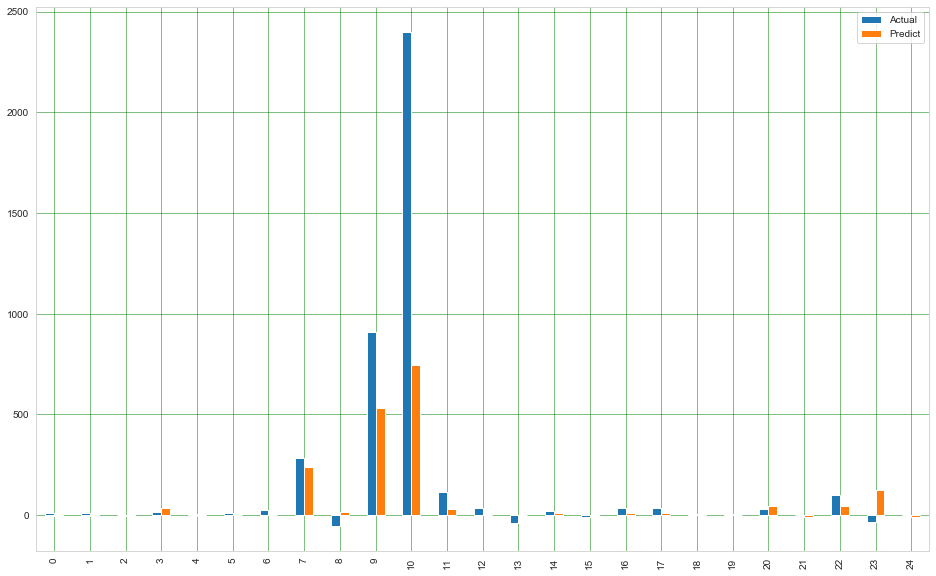

In [148]:
df1 = df_result.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### As clearly shown there is wide differences between the predicted values and actual values

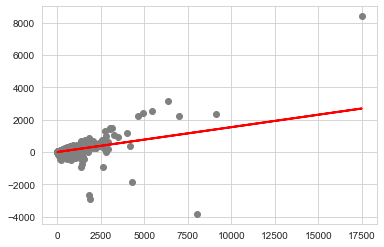

In [149]:
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, pred, color='red', linewidth=2)
plt.show()

### Having confirm the inefficiency in our model, I tried to check for the erros is different forms. They are as highlighted below.

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 56.64425919099401
Mean Squared Error: 59938.24835161891
Root Mean Squared Error: 244.82289180470627


### In a bid to see how to optimize the performance of the model, let's try to increase the feature of our independent variable. Go back up and do just that. Even after increasing the features the accuracy of our model prediction is lower than the previous.